# 1. Data Import and Preprocessing

## 1.1 Load the sensor dataset with pd.read_csv，and generate the dataframe.

In [1]:
import pandas as pd
import numpy as np

data_path ='./Datasets/dataset_new.csv'
columns_name = ('date', 'time', 'sensor_id', 'value', 'activity', 'status') # status是begin或end
df = pd.read_csv(data_path, names = columns_name)

In [2]:
df.dtypes

date         object
time         object
sensor_id    object
value        object
activity     object
status       object
dtype: object

In [3]:
'''
# Testing
df.iloc[:,:4]
df_first4Attr = df.iloc[:,:4]
df[df_first4Attr.isnull().values==True]
'''

'\n# Testing\ndf.iloc[:,:4]\ndf_first4Attr = df.iloc[:,:4]\ndf[df_first4Attr.isnull().values==True]\n'

In [4]:
# Check how many sensors in total.
df['sensor_id'].unique()

array(['M35', 'AD1-A', 'M34', 'M32', 'M33', 'M36', 'M30', 'M29', 'M37',
       'M38', 'M39', 'M41', 'M40', 'M49', 'M46', 'M50', 'M44', 'M47',
       'M48', 'M43', 'M28', 'M42', 'M27', 'M26', 'M25', 'M24', 'M21',
       'M19', 'M18', 'M17', 'M16', 'M15', 'D09', 'M14', 'M13', 'M08',
       'M07', 'M02', 'M45', 'M51', 'D08', 'AD1-B', 'AD1-C', 'D10', 'I03',
       'M06', 'M09', 'M10', 'M01', 'D12', 'L04', 'M23', 'M31', 'D15',
       'D07', 'D14', 'M11', 'M05', 'M03', 'M04', 'M22', 'M12', 'M20',
       'L11', 'D05', 'D03', 'L10', 'L06', 'L13', 'L12', 'L09'],
      dtype=object)

## 1.2 Determine the missing values of the sensor dataframe.

In [5]:
df.dropna(axis=0, how='all', inplace=True) ## Drop the lines containing NA values.
df

,date,time,sensor_id,value,activity,status
0,02/02/2009,7:15:17,M35,ON,R1_Bed_to_Toilet,begin
1,02/02/2009,7:15:21,AD1-A,2.82231,NaN,NaN
2,02/02/2009,7:15:23,M35,OFF,NaN,NaN
3,02/02/2009,7:15:23,M35,ON,NaN,NaN
4,02/02/2009,7:15:28,AD1-A,2.79926,NaN,NaN
...,...,...,...,...,...,...
138625,04/04/2009,7:26:16,M48,OFF,NaN,NaN
138626,04/04/2009,7:27:47,M48,ON,NaN,NaN
138627,04/04/2009,7:27:50,M47,ON,NaN,NaN
138628,04/04/2009,7:27:59,M47,OFF,NaN,NaN


## 1.3 Create a new column "datetime" by combining the "date" and "time"

In [6]:
# df["datetime"] = pd.to_datetime(df["date"] + " "+ df["time"], format='%d/%m/%Y %H:%M:%S')
df["datetime"] = pd.to_datetime(df["date"] + " "+ df["time"], dayfirst=True)


In [7]:
# df = df.set_index("datetime") # Don't set datetime as index! datetime has repeated values!
df # Check status

,date,time,sensor_id,value,activity,status,datetime
0,02/02/2009,7:15:17,M35,ON,R1_Bed_to_Toilet,begin,2009-02-02 07:15:17
1,02/02/2009,7:15:21,AD1-A,2.82231,NaN,NaN,2009-02-02 07:15:21
2,02/02/2009,7:15:23,M35,OFF,NaN,NaN,2009-02-02 07:15:23
3,02/02/2009,7:15:23,M35,ON,NaN,NaN,2009-02-02 07:15:23
4,02/02/2009,7:15:28,AD1-A,2.79926,NaN,NaN,2009-02-02 07:15:28
...,...,...,...,...,...,...,...
138625,04/04/2009,7:26:16,M48,OFF,NaN,NaN,2009-04-04 07:26:16
138626,04/04/2009,7:27:47,M48,ON,NaN,NaN,2009-04-04 07:27:47
138627,04/04/2009,7:27:50,M47,ON,NaN,NaN,2009-04-04 07:27:50
138628,04/04/2009,7:27:59,M47,OFF,NaN,NaN,2009-04-04 07:27:59


In [8]:
# Check the increasing sequence of datetime. last value <= next value
# for a, b in zip(df.datetime, df.datetime[1:]):
#     if(a>b):
#         print(a)
#
# # all(a <= b for a, b in zip(df.index, df.index[1:]))

## 1.4 Distinguish public events: process each public activity, count and compare the total number of triggers of all sensors in R1 and R2 rooms in each activity. R1 triggers more than R2. This public event is marked as R2, otherwise it is marked as R1.

The result is bad, give up

In [9]:
'''
# Transform "value" column's "ON" and "OPEN" to 1，"OFF" and "CLOSE" to 0

# df["value"].unique()

one_vals = ["ON","OPEN", "PRESENT"]
zero_vals = ["OFF","CLOSE", "ABSENT"]

df.loc[df['value'].isin(one_vals), 'value'] = 1
df.loc[df['value'].isin(zero_vals), 'value'] = 0
df
'''


'\n# Transform "value" column\'s "ON" and "OPEN" to 1，"OFF" and "CLOSE" to 0\n\n# df["value"].unique()\n\none_vals = ["ON","OPEN", "PRESENT"]\nzero_vals = ["OFF","CLOSE", "ABSENT"]\n\ndf.loc[df[\'value\'].isin(one_vals), \'value\'] = 1\ndf.loc[df[\'value\'].isin(zero_vals), \'value\'] = 0\ndf\n'

In [10]:
# check total number of begin== total number of end
def check_begin_end_total(df):
    cnt_begin = 0
    cnt_end = 0
    for index,row in df.iterrows():
        if row.status == 'begin':
            cnt_begin += 1
        elif row.status == 'end':
            cnt_end += 1
    print(cnt_begin)
    print(cnt_end)
# check_begin_end_total(df)

516
516


In [11]:
# Check that the activities of the begin end pair can offset each other
def check_activity_symmetry(df):
    stack = []
    cnt = 0
    for index,row in df.iterrows():
        if not pd.isnull(row.activity):
            if row.status == 'begin':
                stack.append(row.activity)
            elif row.status == 'end':
                stack.pop()

        # Print every 1000 times
        cnt += 1
        if cnt % 1000 == 0:
            print(stack)

    print("The final stack value:", stack)

# check_activity_symmetry(df)

['Watch_TV']
['R1_Work', 'R2_Work']
['R1_Work']
['Meal_Preparation']
['Meal_Preparation']
['R1_Sleep', 'R2_Sleep']
['Meal_Preparation']
['R2_Work']
['R2_Work', 'R2_Sleep']
['Meal_Preparation']
['R1_Work']
['R1_Work', 'R2_Work']
['R2_Sleep', 'R1_Sleep']
['Meal_Preparation']
['R1_Work', 'Clean']
['Study', 'R1_Work']
['Study', 'R1_Work']
['R1_Sleep', 'R2_Sleep']
['Meal_Preparation']
['R1_Work']
['Watch_TV']
['Watch_TV', 'R2_Sleep']
['R1_Personal_Hygiene']
['Meal_Preparation']
['Meal_Preparation']
['Meal_Preparation']
[]
['Meal_Preparation']
['R1_Work', 'R2_Sleep']
['R1_Work', 'R1_Sleep', 'R1_Bed_to_Toilet']
['R1_Work', 'R2_Personal_Hygiene']
['Meal_Preparation', 'Watch_TV']
['Meal_Preparation', 'R1_Work']
['Meal_Preparation', 'R1_Work']
['Meal_Preparation', 'R1_Sleep']
['Watch_TV', 'Meal_Preparation']
['Watch_TV', 'Meal_Preparation']
['Watch_TV', 'R1_Work', 'R2_Work']
['R1_Sleep', 'R2_Sleep']
['Meal_Preparation']
['R1_Sleep', 'R2_Work']
['R1_Sleep', 'R1_Work']
['Meal_Preparation']
['Meal_

In [12]:
df

,date,time,sensor_id,value,activity,status,datetime
0,02/02/2009,7:15:17,M35,ON,R1_Bed_to_Toilet,begin,2009-02-02 07:15:17
1,02/02/2009,7:15:21,AD1-A,2.82231,NaN,NaN,2009-02-02 07:15:21
2,02/02/2009,7:15:23,M35,OFF,NaN,NaN,2009-02-02 07:15:23
3,02/02/2009,7:15:23,M35,ON,NaN,NaN,2009-02-02 07:15:23
4,02/02/2009,7:15:28,AD1-A,2.79926,NaN,NaN,2009-02-02 07:15:28
...,...,...,...,...,...,...,...
138625,04/04/2009,7:26:16,M48,OFF,NaN,NaN,2009-04-04 07:26:16
138626,04/04/2009,7:27:47,M48,ON,NaN,NaN,2009-04-04 07:27:47
138627,04/04/2009,7:27:50,M47,ON,NaN,NaN,2009-04-04 07:27:50
138628,04/04/2009,7:27:59,M47,OFF,NaN,NaN,2009-04-04 07:27:59


In [13]:
df.loc[[0,1,2],["activity","status"]]

,activity,status
0,R1_Bed_to_Toilet,begin
1,NaN,NaN
2,NaN,NaN


In [14]:
df["sensor_id"].unique()

array(['M35', 'AD1-A', 'M34', 'M32', 'M33', 'M36', 'M30', 'M29', 'M37',
       'M38', 'M39', 'M41', 'M40', 'M49', 'M46', 'M50', 'M44', 'M47',
       'M48', 'M43', 'M28', 'M42', 'M27', 'M26', 'M25', 'M24', 'M21',
       'M19', 'M18', 'M17', 'M16', 'M15', 'D09', 'M14', 'M13', 'M08',
       'M07', 'M02', 'M45', 'M51', 'D08', 'AD1-B', 'AD1-C', 'D10', 'I03',
       'M06', 'M09', 'M10', 'M01', 'D12', 'L04', 'M23', 'M31', 'D15',
       'D07', 'D14', 'M11', 'M05', 'M03', 'M04', 'M22', 'M12', 'M20',
       'L11', 'D05', 'D03', 'L10', 'L06', 'L13', 'L12', 'L09'],
      dtype=object)

In [15]:

# Classify public events
# The most results are 0 and we cannot compare, give up.
'''
common_activities_list = ["Meal_Preparation", "Watch_TV", "Wash_Bathtub", "Clean", "Study"]
R1_room_sensor_list = ["M30","M31","M32","M33","M34","M35","M36","I03"]
R2_room_sensor_list = ["M43","M44","M45","M46","M47","M48","M49","M50"]

for index,row in df.iterrows():
    if row["activity"] in common_activities_list:
        if row.status == 'begin':
            tmp_index = index
            R1_room_sensor_cnt = 0
            R2_room_sensor_cnt = 0
            while (df.loc[tmp_index, "activity"] != row["activity"]) or (df.loc[tmp_index, "status"] != "end"):
                if (df.loc[tmp_index, "sensor_id"] in R1_room_sensor_list) and (df.loc[tmp_index, "value"] == 1):
                    R1_room_sensor_cnt += 1
                if (df.loc[tmp_index, "sensor_id"] in R2_room_sensor_list) and (df.loc[tmp_index, "value"] == 1):
                    R2_room_sensor_cnt += 1
                tmp_index += 1

            if (df.loc[tmp_index, "sensor_id"] in R1_room_sensor_list) and (df.loc[tmp_index, "value"] == 1):
                    R1_room_sensor_cnt += 1
            if (df.loc[tmp_index, "sensor_id"] in R2_room_sensor_list) and (df.loc[tmp_index, "value"] == 1):
                R2_room_sensor_cnt += 1

            # Change names
            print(R1_room_sensor_cnt, R2_room_sensor_cnt)
            new_name = ""
            if R1_room_sensor_cnt > R2_room_sensor_cnt:
                print("对activity"+row.activity+", Number of R1 room's sensor > R2's")
                new_name = "R2_" + row["activity"]
            elif R1_room_sensor_cnt == R2_room_sensor_cnt:
                print("对activity"+row.activity+", Number of R1 room's sensor == R2's")
                new_name = "R1_" + row["activity"]
            else:
                print("对activity"+row.activity+", Number of R1 room's sensor < R2's")
                new_name = "R1_" + row["activity"]

            tmp_index = index
            while (df.loc[tmp_index, "activity"] != row["activity"]) or (df.loc[tmp_index, "status"] != "end"):
                tmp_index += 1

            df.loc[index, "activity"] = new_name # rename begin column
            df.loc[tmp_index, "activity"] = new_name # rename end column
'''

'\ncommon_activities_list = ["Meal_Preparation", "Watch_TV", "Wash_Bathtub", "Clean", "Study"]\nR1_room_sensor_list = ["M30","M31","M32","M33","M34","M35","M36","I03"]\nR2_room_sensor_list = ["M43","M44","M45","M46","M47","M48","M49","M50"]\n\nfor index,row in df.iterrows():\n    if row["activity"] in common_activities_list:\n        if row.status == \'begin\':\n            tmp_index = index\n            R1_room_sensor_cnt = 0\n            R2_room_sensor_cnt = 0\n            while (df.loc[tmp_index, "activity"] != row["activity"]) or (df.loc[tmp_index, "status"] != "end"):\n                if (df.loc[tmp_index, "sensor_id"] in R1_room_sensor_list) and (df.loc[tmp_index, "value"] == 1):\n                    R1_room_sensor_cnt += 1\n                if (df.loc[tmp_index, "sensor_id"] in R2_room_sensor_list) and (df.loc[tmp_index, "value"] == 1):\n                    R2_room_sensor_cnt += 1\n                tmp_index += 1\n\n            if (df.loc[tmp_index, "sensor_id"] in R1_room_sensor_

In [16]:
df

,date,time,sensor_id,value,activity,status,datetime
0,02/02/2009,7:15:17,M35,ON,R1_Bed_to_Toilet,begin,2009-02-02 07:15:17
1,02/02/2009,7:15:21,AD1-A,2.82231,NaN,NaN,2009-02-02 07:15:21
2,02/02/2009,7:15:23,M35,OFF,NaN,NaN,2009-02-02 07:15:23
3,02/02/2009,7:15:23,M35,ON,NaN,NaN,2009-02-02 07:15:23
4,02/02/2009,7:15:28,AD1-A,2.79926,NaN,NaN,2009-02-02 07:15:28
...,...,...,...,...,...,...,...
138625,04/04/2009,7:26:16,M48,OFF,NaN,NaN,2009-04-04 07:26:16
138626,04/04/2009,7:27:47,M48,ON,NaN,NaN,2009-04-04 07:27:47
138627,04/04/2009,7:27:50,M47,ON,NaN,NaN,2009-04-04 07:27:50
138628,04/04/2009,7:27:59,M47,OFF,NaN,NaN,2009-04-04 07:27:59


## 1.5 Label the activities surrounded by begin end. The activities outside begin end are marked as "other". Nested activities are marked according to the nearest begin end. After marking, delete the columns begin and end.

In [17]:
# Fill in the value of activity: fill in the latest activity in the middle of begin end, and fill in other outside of begin end.

# def set_activity(df):
stack = []
cnt = 0
for index,row in df.iterrows():
    if not pd.isnull(row["activity"]):
#         print("yes activity!", row.activity)
#         print(cnt)
        if row.status == 'begin':
            stack.append(row.activity)
        elif row.status == 'end':
            del(stack[stack.index(row.activity)])
    else:
        # Judge whether it is surrounded by begin end
        if len(stack) == 0:
            df.loc[index, 'activity'] = "other"
        else:
            df.loc[index, 'activity'] = stack[-1]

    cnt += 1
    # return df

df

,date,time,sensor_id,value,activity,status,datetime
0,02/02/2009,7:15:17,M35,ON,R1_Bed_to_Toilet,begin,2009-02-02 07:15:17
1,02/02/2009,7:15:21,AD1-A,2.82231,R1_Bed_to_Toilet,NaN,2009-02-02 07:15:21
2,02/02/2009,7:15:23,M35,OFF,R1_Bed_to_Toilet,NaN,2009-02-02 07:15:23
3,02/02/2009,7:15:23,M35,ON,R1_Bed_to_Toilet,NaN,2009-02-02 07:15:23
4,02/02/2009,7:15:28,AD1-A,2.79926,R1_Bed_to_Toilet,NaN,2009-02-02 07:15:28
...,...,...,...,...,...,...,...
138625,04/04/2009,7:26:16,M48,OFF,R2_Sleep,NaN,2009-04-04 07:26:16
138626,04/04/2009,7:27:47,M48,ON,R2_Sleep,NaN,2009-04-04 07:27:47
138627,04/04/2009,7:27:50,M47,ON,R2_Sleep,NaN,2009-04-04 07:27:50
138628,04/04/2009,7:27:59,M47,OFF,R2_Sleep,NaN,2009-04-04 07:27:59


## 1.6 Set sensor_id and activities converted to numerical values for model training

In [18]:
from sklearn.preprocessing import LabelEncoder

# Labelencoder the sensor
sensor_encoder = LabelEncoder()
sensor_encoder.fit(df.sensor_id)

# LabelEncoder the activity
activity_encoder = LabelEncoder()
activity_encoder.fit(df.activity.astype(str))

df.sensor_id = sensor_encoder.transform(df.sensor_id)
df.activity = activity_encoder.transform(df.activity.astype(str))

In [19]:
# Output the encoded value of label encoder.
print(sorted(df.sensor_id.unique()))
print(sorted(df.activity.unique()))

# View the original name corresponding to the number
print(sensor_encoder.inverse_transform(sorted(df.sensor_id.unique())))
print(activity_encoder.inverse_transform(sorted(df.activity.unique())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
['AD1-A' 'AD1-B' 'AD1-C' 'D03' 'D05' 'D07' 'D08' 'D09' 'D10' 'D12' 'D14'
 'D15' 'I03' 'L04' 'L06' 'L09' 'L10' 'L11' 'L12' 'L13' 'M01' 'M02' 'M03'
 'M04' 'M05' 'M06' 'M07' 'M08' 'M09' 'M10' 'M11' 'M12' 'M13' 'M14' 'M15'
 'M16' 'M17' 'M18' 'M19' 'M20' 'M21' 'M22' 'M23' 'M24' 'M25' 'M26' 'M27'
 'M28' 'M29' 'M30' 'M31' 'M32' 'M33' 'M34' 'M35' 'M36' 'M37' 'M38' 'M39'
 'M40' 'M41' 'M42' 'M43' 'M44' 'M45' 'M46' 'M47' 'M48' 'M49' 'M50' 'M51']
['Clean' 'Meal_Preparation' 'R1_Bed_to_Toilet' 'R1_Personal_Hygiene'
 'R1_Sleep' 'R1_Work' 'R2_Bed_to_Toilet' 'R2_Personal_Hygiene' 'R2_Sleep'
 'R2_Work' 'Study' 'Wash_Bathtub' 'Watch_TV' 'other']


In [20]:
df

,date,time,sensor_id,value,activity,status,datetime
0,02/02/2009,7:15:17,54,ON,2,begin,2009-02-02 07:15:17
1,02/02/2009,7:15:21,0,2.82231,2,NaN,2009-02-02 07:15:21
2,02/02/2009,7:15:23,54,OFF,2,NaN,2009-02-02 07:15:23
3,02/02/2009,7:15:23,54,ON,2,NaN,2009-02-02 07:15:23
4,02/02/2009,7:15:28,0,2.79926,2,NaN,2009-02-02 07:15:28
...,...,...,...,...,...,...,...
138625,04/04/2009,7:26:16,67,OFF,8,NaN,2009-04-04 07:26:16
138626,04/04/2009,7:27:47,67,ON,8,NaN,2009-04-04 07:27:47
138627,04/04/2009,7:27:50,66,ON,8,NaN,2009-04-04 07:27:50
138628,04/04/2009,7:27:59,66,OFF,8,NaN,2009-04-04 07:27:59


## 1.7 Construct mutual matrix

In [21]:
## Construct mutual matrix
current_activity = df.iloc[0].activity
wind = []
winds=[]
winnum = 0

sens_num = len(df.sensor_id.unique()) # 71
mutual_matrix = np.zeros((sens_num, sens_num))
sensnum = sens_num

for idx, row in df.iterrows():
        # Judge by the current event
        if current_activity == row.activity:
            wind.append(row.sensor_id)
        # The first occurrence of a non current event - the next activity
        else:
            sensors = np.unique(wind)
            # The sensors involved in the current event_ ID (unique) is filled in the symmetric mutual matrix
            for sensor in range(0, sensnum):
                for sensor2 in range(0, sensnum):
                    if sensor in sensors and sensor2 in sensors:
                        mutual_matrix[sensor][sensor2] += 1
                        winds.append(wind)

            winnum += 1
            # reset
            current_activity = row.activity
            # reset window
            wind = [row.sensor_id]

mutual_matrix = mutual_matrix/winnum

In [22]:
mutual_matrix

array([[0.13372781, 0.09467456, 0.04378698, ..., 0.00236686, 0.00828402,
        0.10650888],
       [0.09467456, 0.13727811, 0.0556213 , ..., 0.00236686, 0.00591716,
        0.12307692],
       [0.04378698, 0.0556213 , 0.05680473, ..., 0.        , 0.00118343,
        0.05325444],
       ...,
       [0.00236686, 0.00236686, 0.        , ..., 0.06745562, 0.04615385,
        0.00591716],
       [0.00828402, 0.00591716, 0.00118343, ..., 0.04615385, 0.1147929 ,
        0.00591716],
       [0.10650888, 0.12307692, 0.05325444, ..., 0.00591716, 0.00591716,
        0.15502959]])

In [23]:
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # correlation_heatmap = sns.heatmap(cm,linewidths=0.5)
    # figure = correlation_heatmap.get_figure()
    # plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm, cmap=cmap)

    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #     plt.text(j, i, format(cm[i, j], fmt),
    #              horizontalalignment="center",
    #              color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


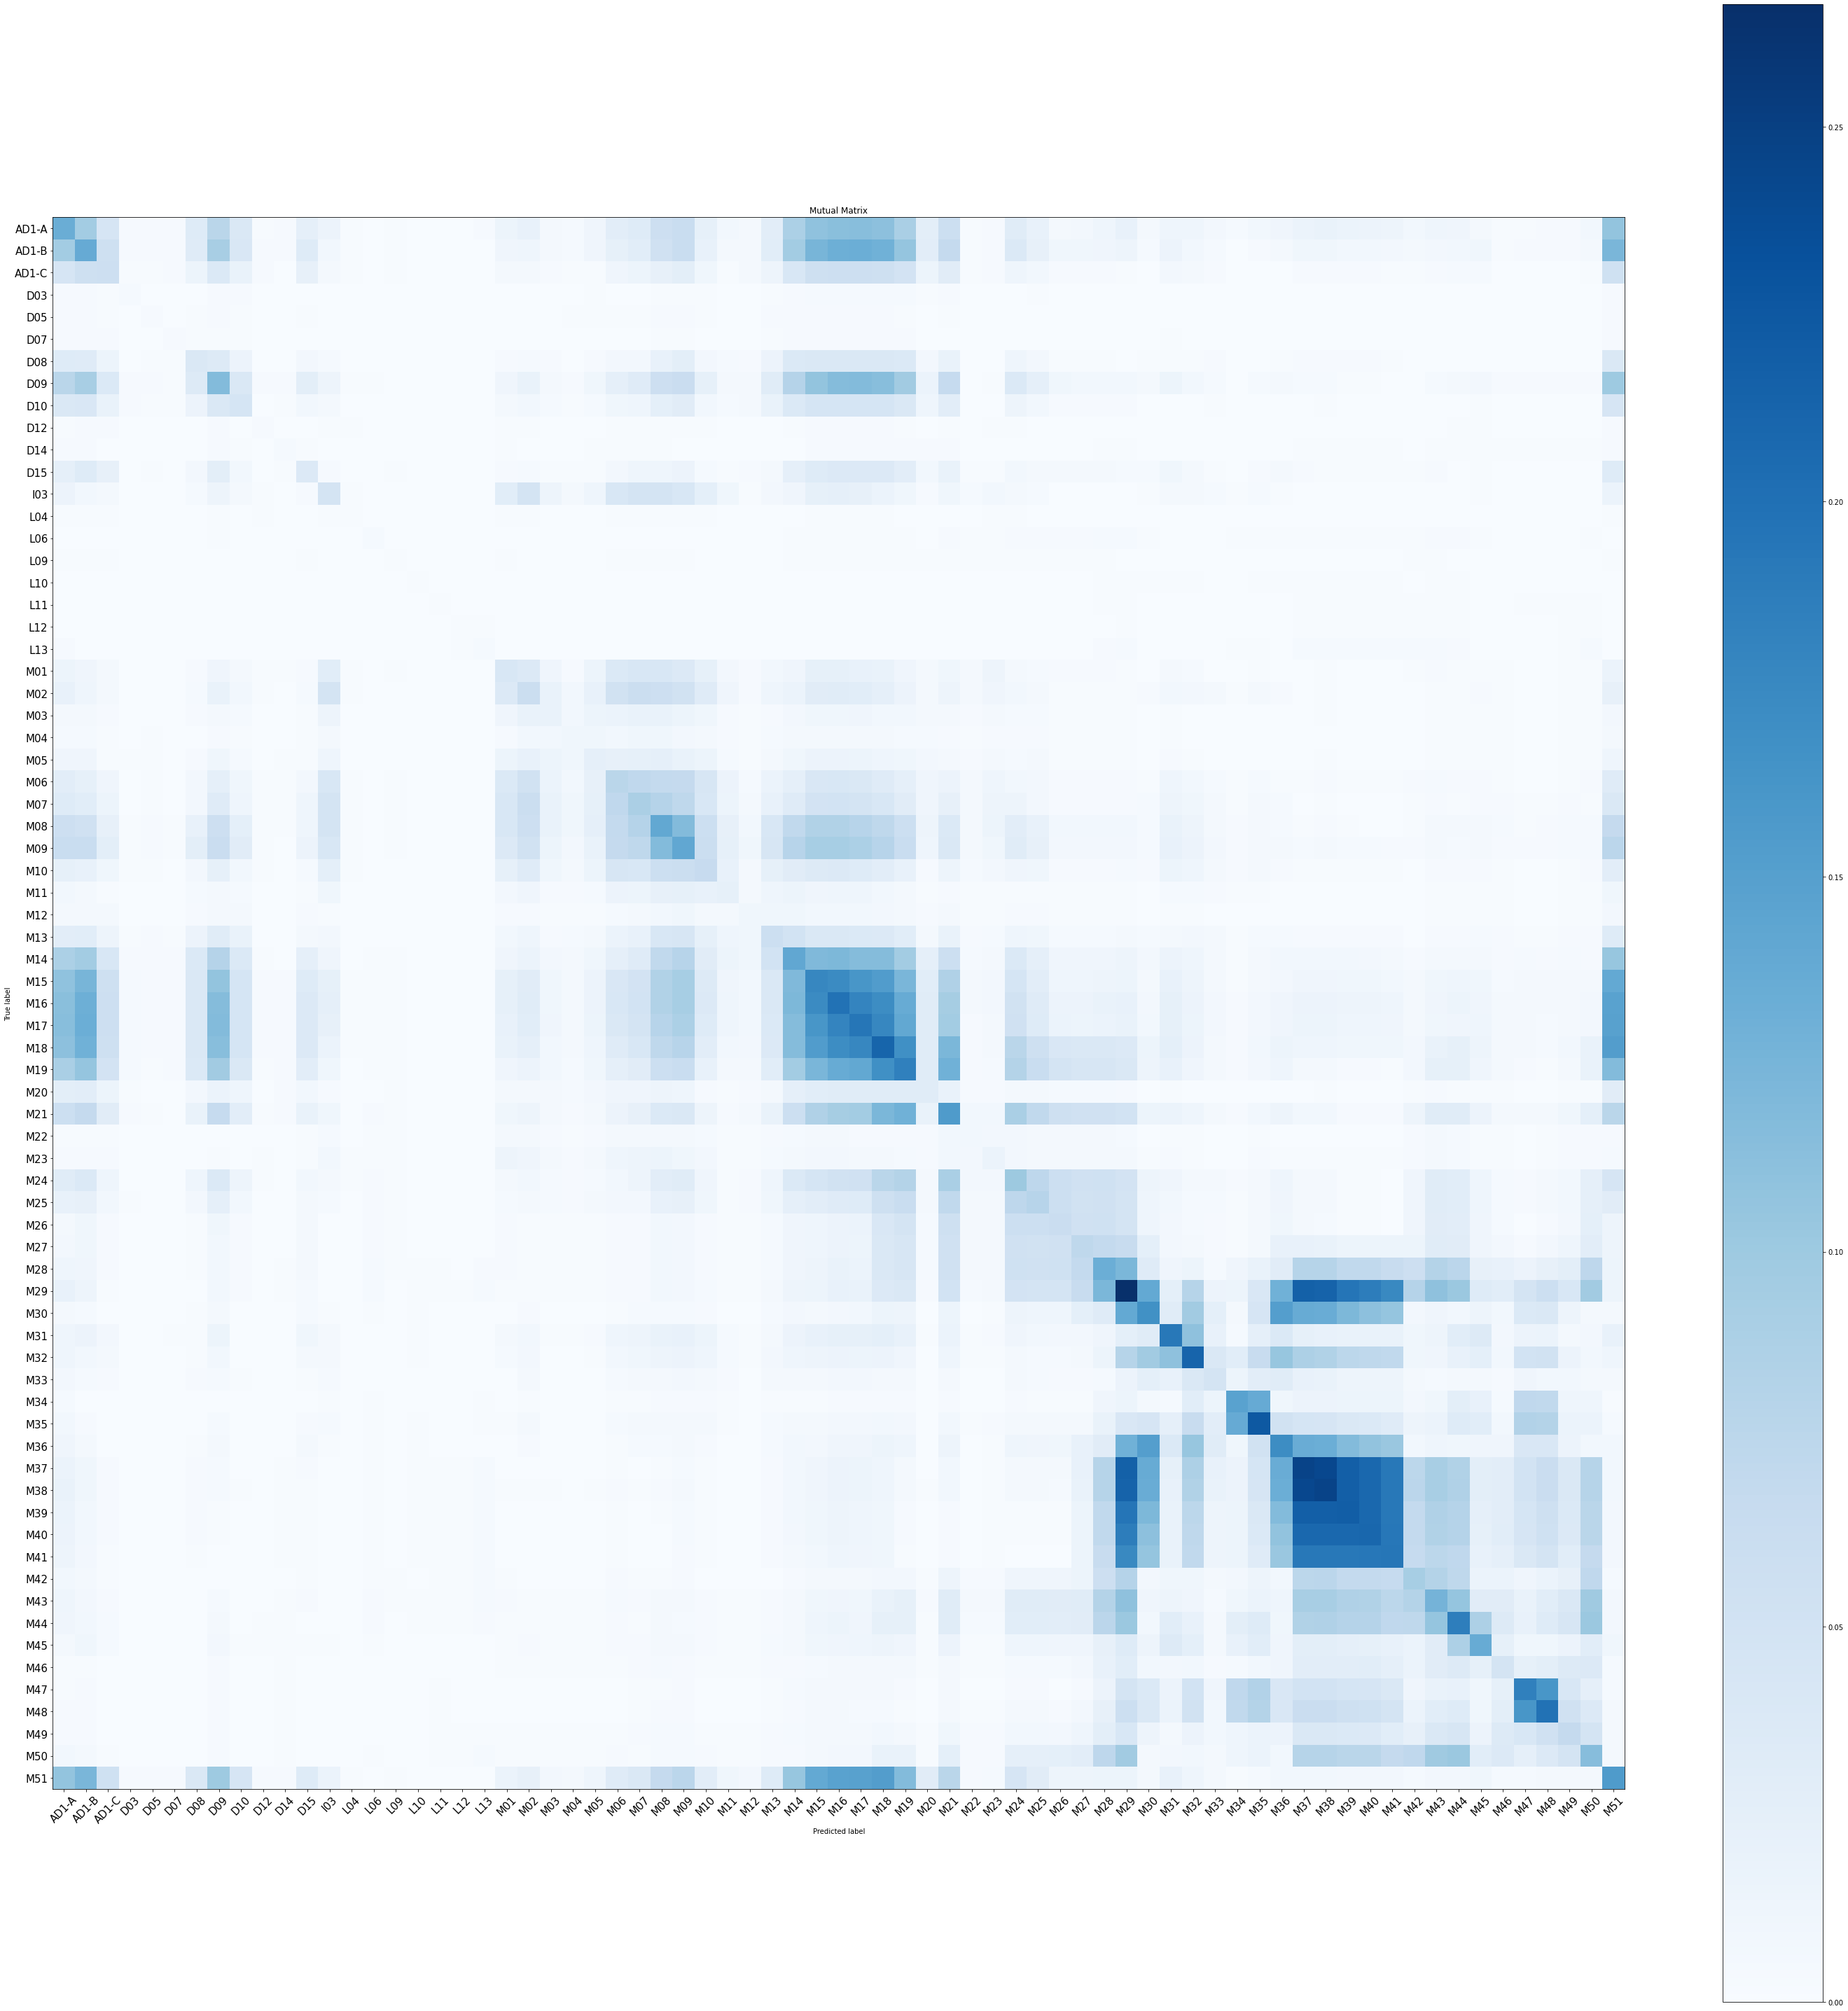

In [24]:
plt.figure(figsize=(40, 40))
plot_confusion_matrix(mutual_matrix, classes=sensor_encoder.inverse_transform(sorted(df.sensor_id.unique())), normalize=False, title='Mutual Matrix')
plt.tick_params(labelsize = 15)
plt.savefig("images_ActivityRecognition/confusion_matrix.pdf")
plt.show()

## 1.8 Sliding window

In [25]:
# from datetime import datetime
# idx = 0
# sliding_window_length = 6
# windows = df.iloc[idx:idx + sliding_window_length]
# windows

In [26]:
# last_activity = windows.iloc[sliding_window_length-1].activity
# 
# start_time = windows.iloc[0].datetime
# last_time = windows.iloc[sliding_window_length - 1].datetime
# last_time = datetime(last_time.year, last_time.month, last_time.day, last_time.hour, last_time.minute,
#                              last_time.second)
# start_time = datetime(start_time.year, start_time.month, start_time.day, start_time.hour, start_time.minute,
#                       start_time.second)
# last_time = last_time.hour / 24  + last_time.minute / 60. + last_time.second / 3600.
# start_time = start_time.hour / 24 + start_time.minute / 60. + start_time.second / 3600.
# print(start_time)
# print(last_time)

In [27]:
# last_sensor_id = windows.iloc[sliding_window_length - 1].sensor_id
# second_last_id = windows.iloc[sliding_window_length - 2].sensor_id
# print(last_sensor_id)
# print(second_last_id)

In [28]:
# sens_num = len(df.sensor_id.unique()) # 71
# freq = np.zeros(sens_num)
# for ind, act in windows.iterrows():
#     freq[int(act.sensor_id)] += 1
# print(freq)

In [29]:
from datetime import datetime
sliding_window_length = 130
# 30: 92.9329% 94.2965%; 80:96.3623% 97.7589%; 100: 97.412%, 98.581% 120：0.9794， 0.9901; 130: 0.981552, (0.991155 for n_estimator = 100, 0.9917 for n_estimator = 300)
windows_vectors, activities_vectors = [], [],
for idx in range(0, df.shape[0], 1):  #[0,139629]
    current_sens = []
    if df.shape[0] <= idx + sliding_window_length:
        break

    sens_num = len(df.sensor_id.unique()) # 71
    freq = np.zeros(sens_num)
    # Take the front sliding_ window_ Length line as windows
    windows = df.iloc[idx:idx + sliding_window_length]
    # Event in the last line of the window
    last_activity = windows.iloc[sliding_window_length-1].activity

    # Turn the start time and end time in the window to the value of 0 ~ 1
    start_time = windows.iloc[0].datetime
    last_time = windows.iloc[sliding_window_length - 1].datetime
    last_time = datetime(last_time.year, last_time.month, last_time.day, last_time.hour, last_time.minute,
                                 last_time.second)
    start_time = datetime(start_time.year, start_time.month, start_time.day, start_time.hour, start_time.minute,
                          start_time.second)
    last_time = last_time.hour / 24  + last_time.minute / (60. * 24) + last_time.second / (3600. * 24)
    start_time = start_time.hour / 24 + start_time.minute / (60. * 24)  + start_time.second / (3600. * 24)

    last_sensor_id = windows.iloc[sliding_window_length - 1].sensor_id
    second_last_id = windows.iloc[sliding_window_length - 2].sensor_id

    # Record each sensor in the window_ Number of occurrences of ID
    for ind, act in windows.iterrows():
        freq[int(act.sensor_id)] += 1

    #weighting frequencies using mutual matrix table
    # sensor correlation in the last row of the window
    for ind, val in enumerate(freq):
        freq[ind] = freq[ind] * mutual_matrix[last_sensor_id][ind]

    # Solving extreme situations: last_ time = 0.0001 start_ time = 0.99999999
    if last_time >= start_time:
        timespan = last_time - start_time
    else:
        timespan = (last_time + 1) - start_time

    if(timespan < 0):
        print("Time span < 0! Error!")


    freq = np.append(freq, (last_time, timespan, second_last_id, last_sensor_id)) # 模型输入维度71+4

    windows_vectors.append(freq)
    activities_vectors.append(last_activity) # last_activity 作为label

In [30]:
# windows_vectors

In [31]:
# activities_vectors

In [32]:
    # def get_segments(self):
    #     windows_vectors, activities_vectors = [], [],
    #
    #     for idx in range(0, self.data.shape[0], 1):
    #         current_sens = []
    #         if self.data.shape[0] <= idx + self.sliding_window_length:
    #             break
    #
    #         freq = np.zeros(self.sens_num)
    #         windows = self.data.iloc[idx:idx + self.sliding_window_length]
    #         last_activity = windows.iloc[self.sliding_window_length - 1].activity1
    #
    #         start_time = windows.iloc[0].datetime
    #         last_time = windows.iloc[self.sliding_window_length - 1].datetime
    #         last_time = datetime(last_time.year, last_time.month, last_time.day, last_time.hour, last_time.minute,
    #                              last_time.second)
    #         start_time = datetime(start_time.year, start_time.month, start_time.day, start_time.hour, start_time.minute,
    #                               start_time.second)
    #         last_time = last_time.hour / 24  + last_time.minute / 60. + last_time.second / 3600.
    #         start_time = start_time.hour / 24 + start_time.minute / 60. + start_time.second / 3600.
    #         last_sensor_id = windows.iloc[self.sliding_window_length - 1].sensor_id
    #         second_last_id = windows.iloc[self.sliding_window_length - 2].sensor_id
    #
    #         for ind, act in windows.iterrows():
    #             freq[int(act.sensor_id)] += 1
    #
    #         #weighting frequencies using mutual matrix table
    #         for ind, val in enumerate(freq):
    #             freq[ind] = freq[ind] * self.mutual_matrix[last_sensor_id][ind]
    #
    #         timespan = last_time - start_time
    #         freq = np.append(freq, (last_time, timespan, second_last_id, last_sensor_id))
    #
    #         windows_vectors.append(freq)
    #         activities_vectors.append(last_activity)
    #
    #     return np.array(windows_vectors), np.array(activities_vectors)

## 1.9 Divide training and testing datasets.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    windows_vectors, activities_vectors, test_size=0.2, random_state=42)

In [34]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(110800, 75)
(110800,)
(27700, 75)
(27700,)


# 2. Construct activity recognition RF model.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
from numpy import random
from matplotlib import pyplot as plt
import os

# Below command is used to fix the bug when generating visualized tree in RF.
# only for Windows system.
# os.environ["PATH"] += os.pathsep + "D:/Graphviz/bin/" #记得改文件位置



def DecisionTree_Classifier(x_train, x_valid_test, y_train, y_valid_test):
    """
    First take the training set, and valid or test set as inputs.
    Then classify them binary with DT. Print the information related to classification accuracy.
    Inputs:
        x_train: Preprocessed brain MRI images as inputs to train a model.
        y_train: Label information of x_train as inputs to train a model.
        x_valid_test: Preprocessed brain MRI images to validate or test the classification accuracy of the trained model.
                    The preprocessing of valid or test sets cannot use any information of x_train or y_train.
        y_valid: Label information of valid or test sets to calculate the classification accuracy of the trained model.
    Outputs:
        accu: Accuracy of the model on valid or test set.
        y_pred: Predicted labels on valid or test set.
    """
    # Create RF classifier.
    rf = DecisionTreeClassifier()
    rf.fit(x_train, y_train)  # Fit RF model

    # Plot one of the decision tree
    # text format
    # text_representation = tree.export_text(rf.estimators_[1])
    # print(text_representation)

    # image format
    # ----------------------------------------------------------------
    # dot_data = tree.export_graphviz(rf)
    #
    # graph = graphviz.Source(dot_data)
    # graph.render("DecisionTree")
    # graph.write_pdf("DecisionTree_"+str(seed)+".pdf")
    # ----------------------------------------------------------------

    # Make prediction.
    y_pred = rf.predict(x_valid_test)

    # Print results.
    report = metrics.classification_report(y_valid_test, y_pred)
    # print("Random Forest classification report:\n " + report)
    print("Decision Tree classification report:\n " + report)

    accu = metrics.accuracy_score(y_valid_test, y_pred)
    # print("Random Forest classification accuracy: " + str(accu))
    print("Decision Tree classification accuracy: " + str(accu))

    return accu, y_pred



def RF_Classifier(x_train, x_valid_test, y_train, y_valid_test, feature_names, n_estimators = 100):
    """
    First take the training set, and valid or test set as inputs.
    Then classify them binary with RF. Print the information related to classification accuracy.
    Inputs:
        x_train: Preprocessed brain MRI images as inputs to train a model.
        y_train: Label information of x_train as inputs to train a model.
        x_valid_test: Preprocessed brain MRI images to validate or test the classification accuracy of the trained model.
                    The preprocessing of valid or test sets cannot use any information of x_train or y_train.
        y_valid: Label information of valid or test sets to calculate the classification accuracy of the trained model.
    Outputs:
        accu: Accuracy of the model on valid or test set.
        y_pred: Predicted labels on valid or test set.
    """
    # Create RF classifier.
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    rf.fit(x_train, y_train)  # Fit RF model

    # 画出特征值重要性
    sorted_idx = rf.feature_importances_.argsort()
    feature_importances = rf.feature_importances_

    plt.figure(figsize=(20, 15))
    plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
    plt.xlabel("Random Forest Feature Importance", fontsize = 30)
    plt.tick_params(axis='x', labelsize = 15)
    plt.savefig("images_ActivityRecognition/RFFeatureImportance.pdf")

    # Plot one of the decision tree
    # text format
    # text_representation = tree.export_text(rf.estimators_[1])
    # print(text_representation)

    # image format
    # ----------------------------------------------------------------
    '''
    seed = random.randint(100)
    dot_data = tree.export_graphviz(rf.estimators_[seed])

    graph = graphviz.Source(dot_data)
    graph.write_pdf("RF_Tree_"+str(seed)+".pdf")
    '''
    # ----------------------------------------------------------------

    # Make prediction.
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_valid_test)

    # Print results.
    report = metrics.classification_report(y_valid_test, y_test_pred, output_dict=True)
    # print("Random Forest classification report on testing dataset:\n " + report)

    train_report = metrics.classification_report(y_train, y_train_pred, output_dict=True)
    # print("Random Forest classification report on training dataset:\n " + report)

    tmp_df = pd.DataFrame(report).transpose()
    tmp_df.to_csv("tables/AR_test_report.csv")

    tmp_df = pd.DataFrame(train_report).transpose()
    tmp_df.to_csv("tables/AR_train_report.csv")

    accu = metrics.accuracy_score(y_valid_test, y_test_pred)
    print("Random Forest classification accuracy on testing dataset: " + str(accu))

    train_accu = metrics.accuracy_score(y_train, y_train_pred)
    print("Random Forest classification accuracy on training dataset: " + str(train_accu))

    return accu, y_test_pred, feature_importances, rf

In [62]:
# Train with training set and predict on test set.
#
# score, _ = DecisionTree_Classifier(X_train, X_test, y_train, y_test)

In [63]:
feature_names = sensor_encoder.inverse_transform(sorted(df.sensor_id.unique()))
tmp_list = ["last_time", "time_span", "second_last_id", "last_sensor_id"]
feature_names = np.append(feature_names, tmp_list)
print(feature_names)

['AD1-A' 'AD1-B' 'AD1-C' 'D03' 'D05' 'D07' 'D08' 'D09' 'D10' 'D12' 'D14'
 'D15' 'I03' 'L04' 'L06' 'L09' 'L10' 'L11' 'L12' 'L13' 'M01' 'M02' 'M03'
 'M04' 'M05' 'M06' 'M07' 'M08' 'M09' 'M10' 'M11' 'M12' 'M13' 'M14' 'M15'
 'M16' 'M17' 'M18' 'M19' 'M20' 'M21' 'M22' 'M23' 'M24' 'M25' 'M26' 'M27'
 'M28' 'M29' 'M30' 'M31' 'M32' 'M33' 'M34' 'M35' 'M36' 'M37' 'M38' 'M39'
 'M40' 'M41' 'M42' 'M43' 'M44' 'M45' 'M46' 'M47' 'M48' 'M49' 'M50' 'M51'
 'last_time' 'time_span' 'second_last_id' 'last_sensor_id']


Random Forest classification accuracy on testing dataset: 0.9912996389891697
Random Forest classification accuracy on training dataset: 1.0


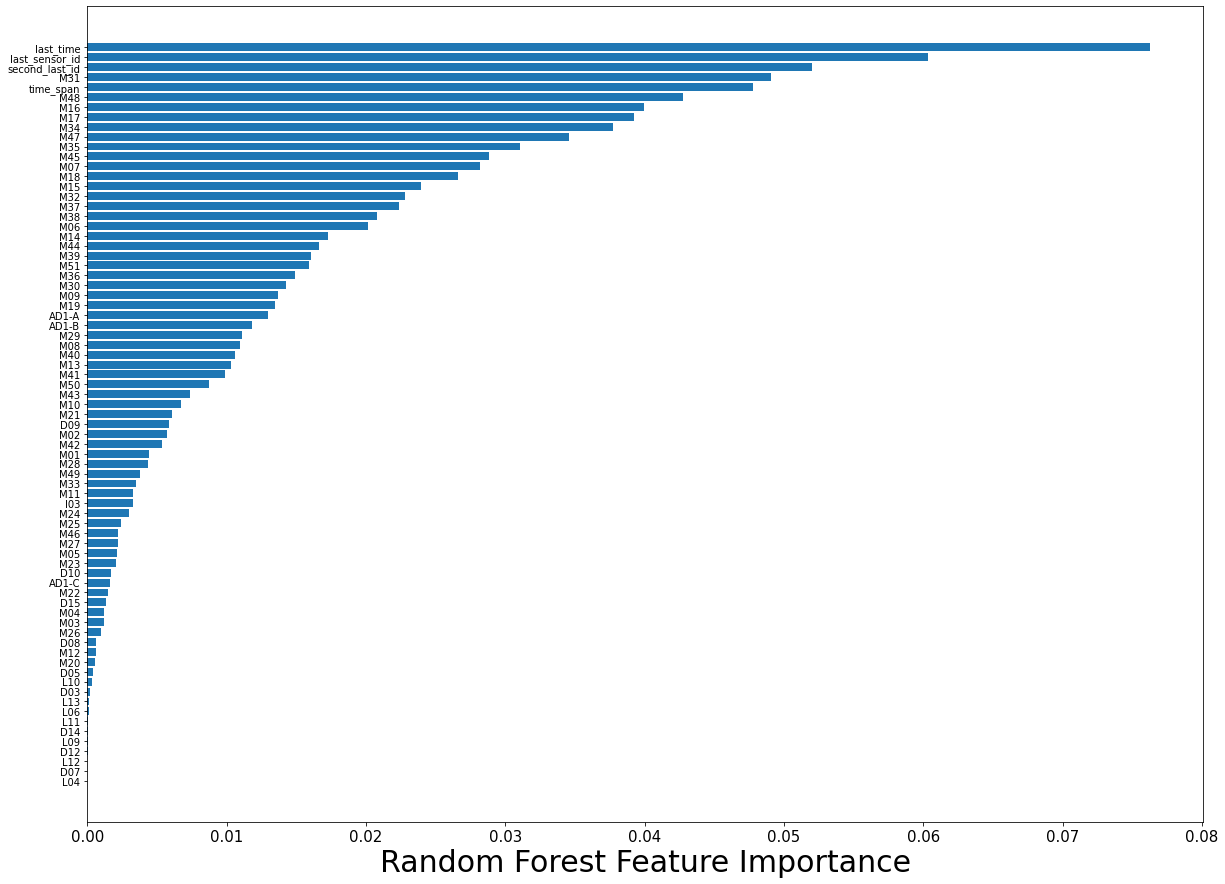

In [65]:
score, _, feature_importances, RF_model = RF_Classifier(X_train, X_test, y_train, y_test, feature_names = feature_names, n_estimators=300)

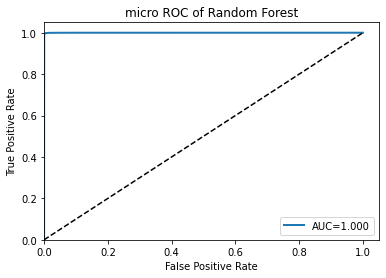

In [52]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

classes = ['Clean', 'Meal_Preparation', 'R1_Bed_to_Toilet', 'R1_Personal_Hygiene',
 'R1_Sleep', 'R1_Work', 'R2_Bed_to_Toilet', 'R2_Personal_Hygiene', 'R2_Sleep',
 'R2_Work', 'Study', 'Wash_Bathtub', 'Watch_TV', 'other']

scores_rf = RF_model.predict_proba(X_test)


### Draw the ROC of multiple classes
# for i in range(0, 14):
#     fpr, tpr, thresholds = roc_curve(y_test, scores_rf[:, i], pos_label=i)
#     auc_ = auc(fpr, tpr)
#     lw = 2
#     plt.plot(fpr, tpr,
#              lw=lw, label='ROC curve of {} (area = %0.2f)'.format(classes[i]) % auc_)
#     # plt.legend(loc="lower right")
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multiclass ROC of RF')
# plt.show()

### Draw the micro ROC
targets_one_hot = label_binarize(y_test, classes=np.arange(14))
auc_micro = roc_auc_score(targets_one_hot, scores_rf, average='micro')
fpr, tpr, thresholds = roc_curve(targets_one_hot.ravel(), scores_rf.ravel())
plt.plot(fpr, tpr, linewidth=2, label='AUC=%.3f' % auc_micro)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1.05, 0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('micro ROC of Random Forest')
# plt.savefig('save/roc_CNN_micro.png')
# plt.title('micro ROC of MLP')
# plt.savefig('save/roc_MLP_micro.png')
plt.show()

In [43]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import json

# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances, df):
    _, M = np.array(X_train).shape #有 M = 75 列
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    # X_scaled = X

    out = {}
    for c in set(sorted(df.activity.unique())):
        out[c] = dict(
            zip(range(M), np.mean(np.array(X_scaled)[np.array(Y) == c, :], axis=0)*feature_importances)
        )

    return out

# labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
result = class_feature_importance(X_train, y_train, feature_importances, df)

for a in result:
    print(a, result[a])
    print("\n")


0 {0: 6.826952271838944e-07, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 2.6345774553165003e-05, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0006058209829984132, 21: 0.00041973327499048095, 22: 0.00015217304546123828, 23: 0.00011012458062254105, 24: 2.098515422582259e-05, 25: 0.0009013874590766682, 26: 0.0014221615244941297, 27: 0.0009038395513666489, 28: 0.000292568865909341, 29: 1.051921639221149e-05, 30: 6.688739413438306e-05, 31: 4.158812087637598e-05, 32: 6.853658421024414e-05, 33: 0.0005231979293505661, 34: 0.0006124721868170619, 35: 0.0007599000948890271, 36: 0.0007454150450610789, 37: 0.0014707368070632145, 38: 0.0012223564541867, 39: 7.506648813709928e-06, 40: 0.0009742592191003441, 41: 0.00014716923944473444, 42: 0.00015367964282975364, 43: 0.00030624378363333177, 44: 0.00024544340451014335, 45: 3.4438039723821046e-05, 46: 3.241574038281936e-05, 47: 1.1654936262283121e-05, 48: 6.594955102653445e-06, 49

In [44]:
np.array(X_train)[np.array(y_train) == 5, :]

array([[4.73372781e-03, 0.00000000e+00, 0.00000000e+00, ...,
        2.09490741e-02, 6.40000000e+01, 6.40000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.16666667e-03, 6.40000000e+01, 5.00000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.10416667e-02, 5.00000000e+01, 5.00000000e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.44675926e-03, 5.00000000e+01, 3.20000000e+01],
       [2.84023669e-01, 0.00000000e+00, 5.91715976e-02, ...,
        6.92013889e-02, 5.10000000e+01, 5.10000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.08680556e-02, 5.00000000e+01, 5.00000000e+01]])

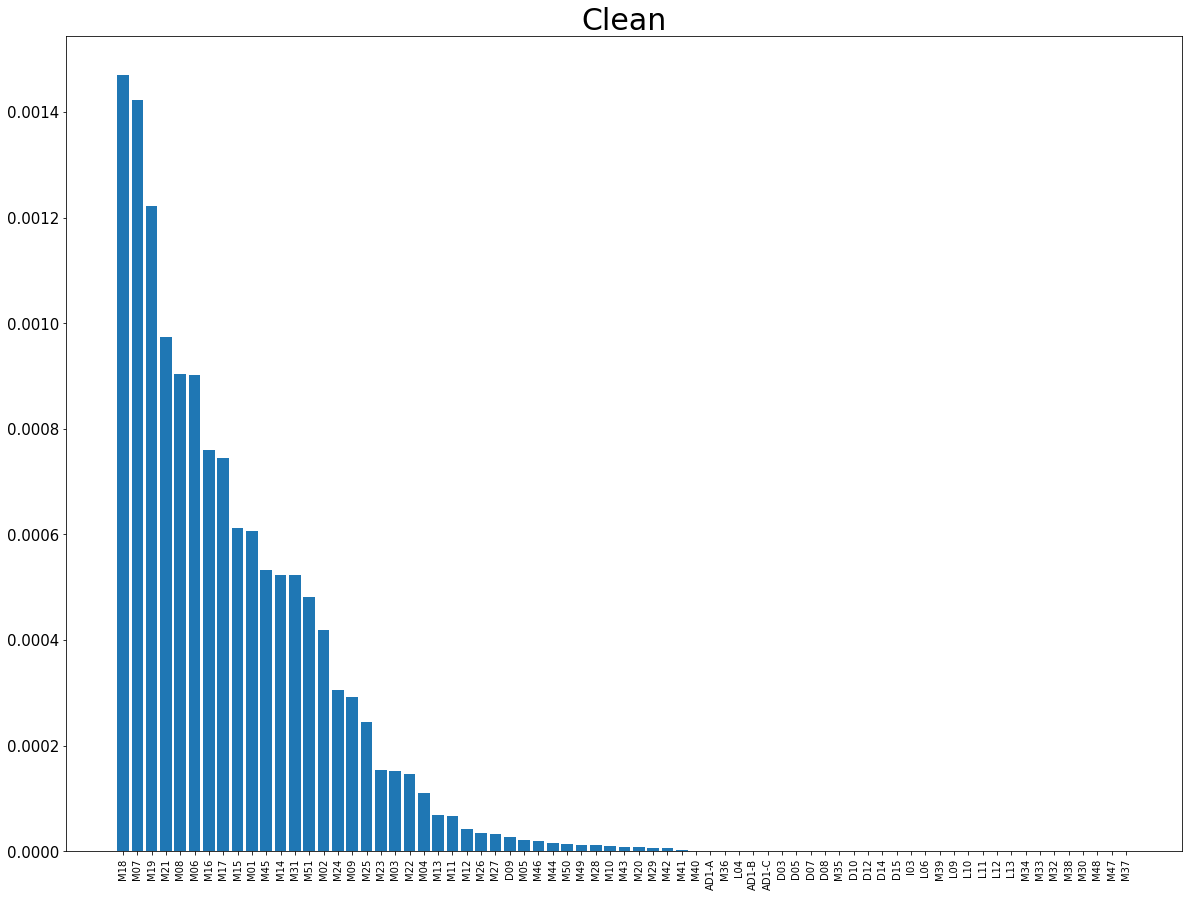

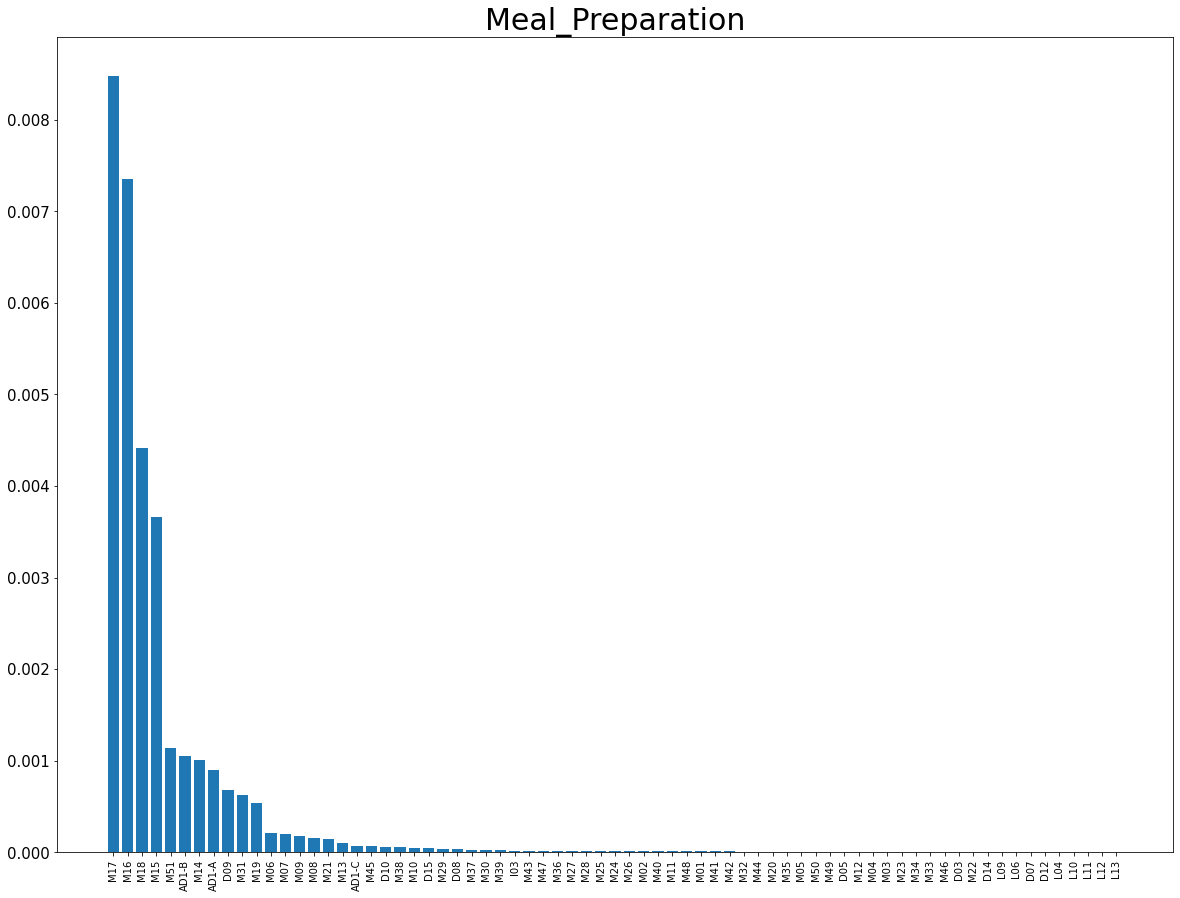

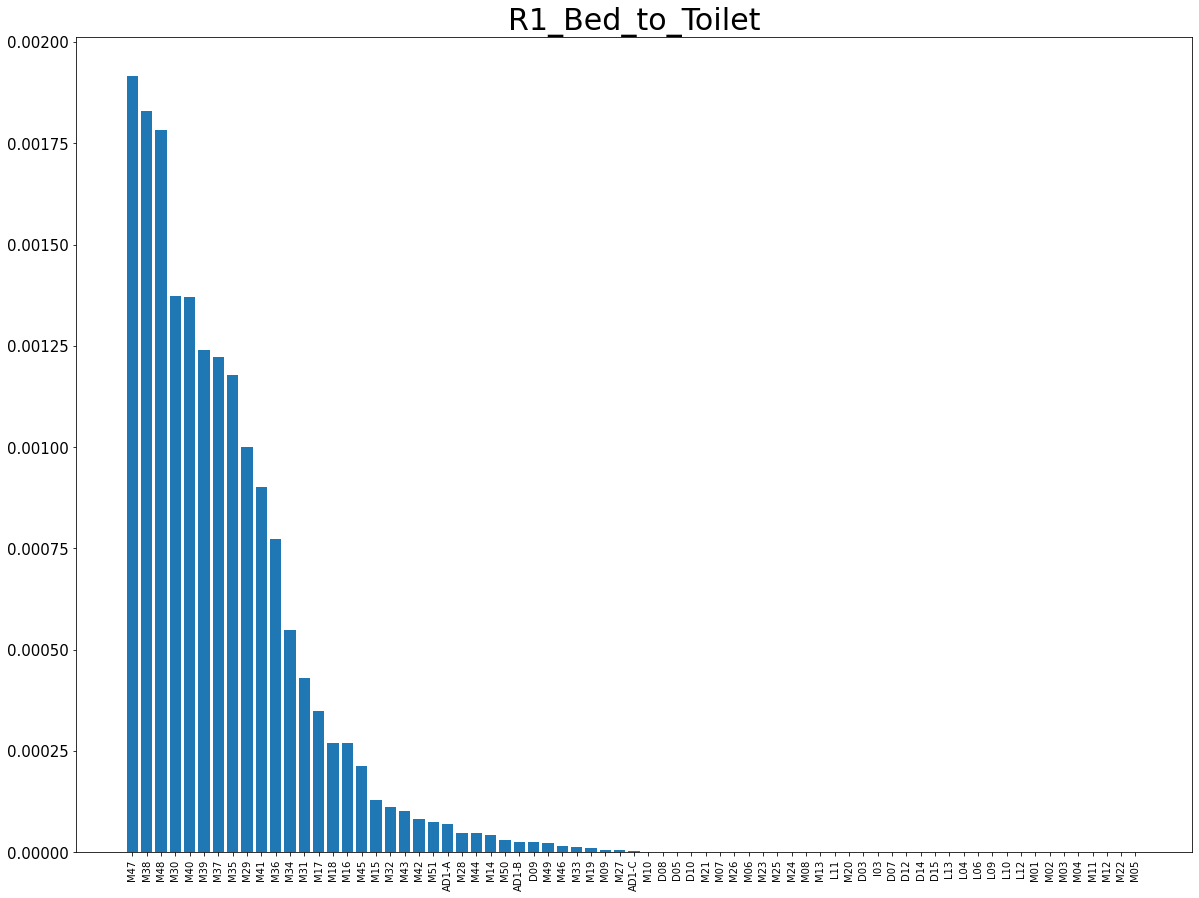

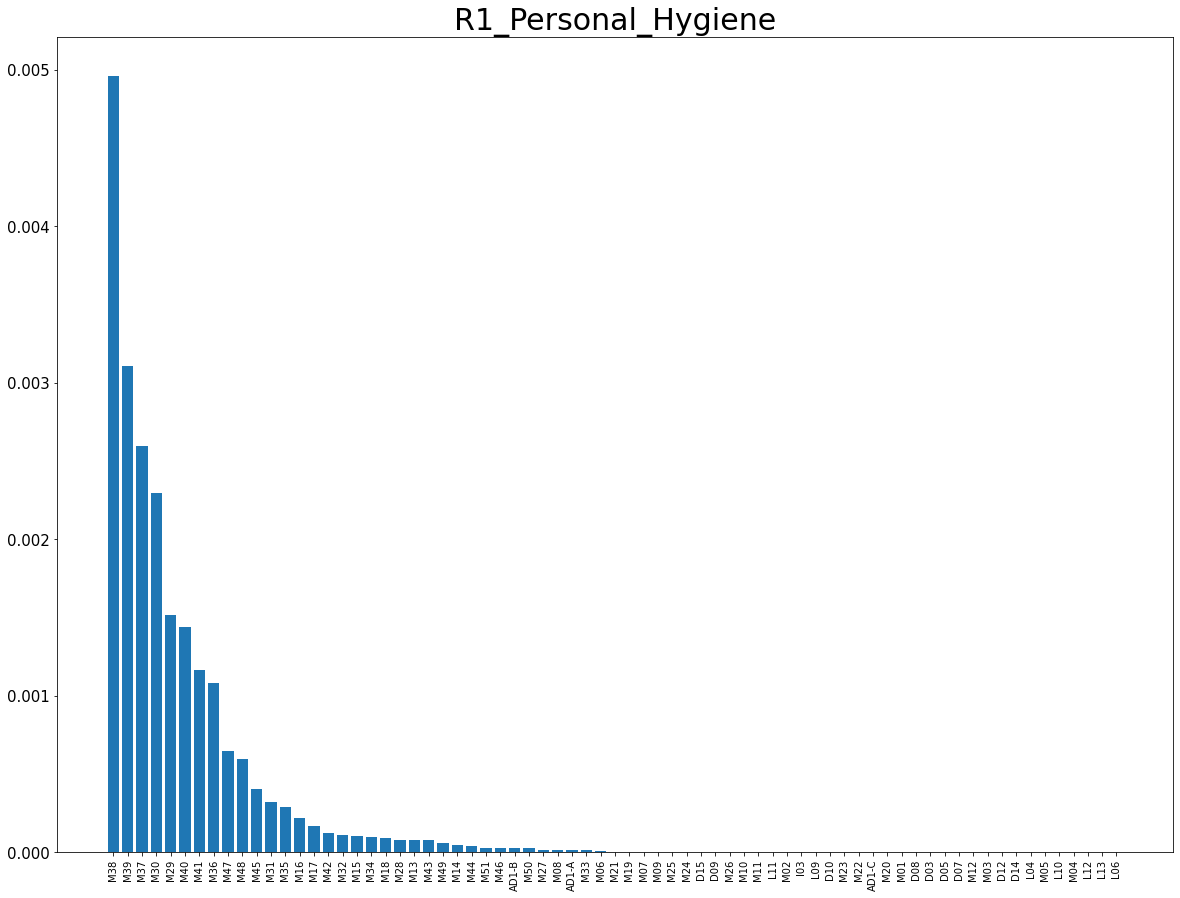

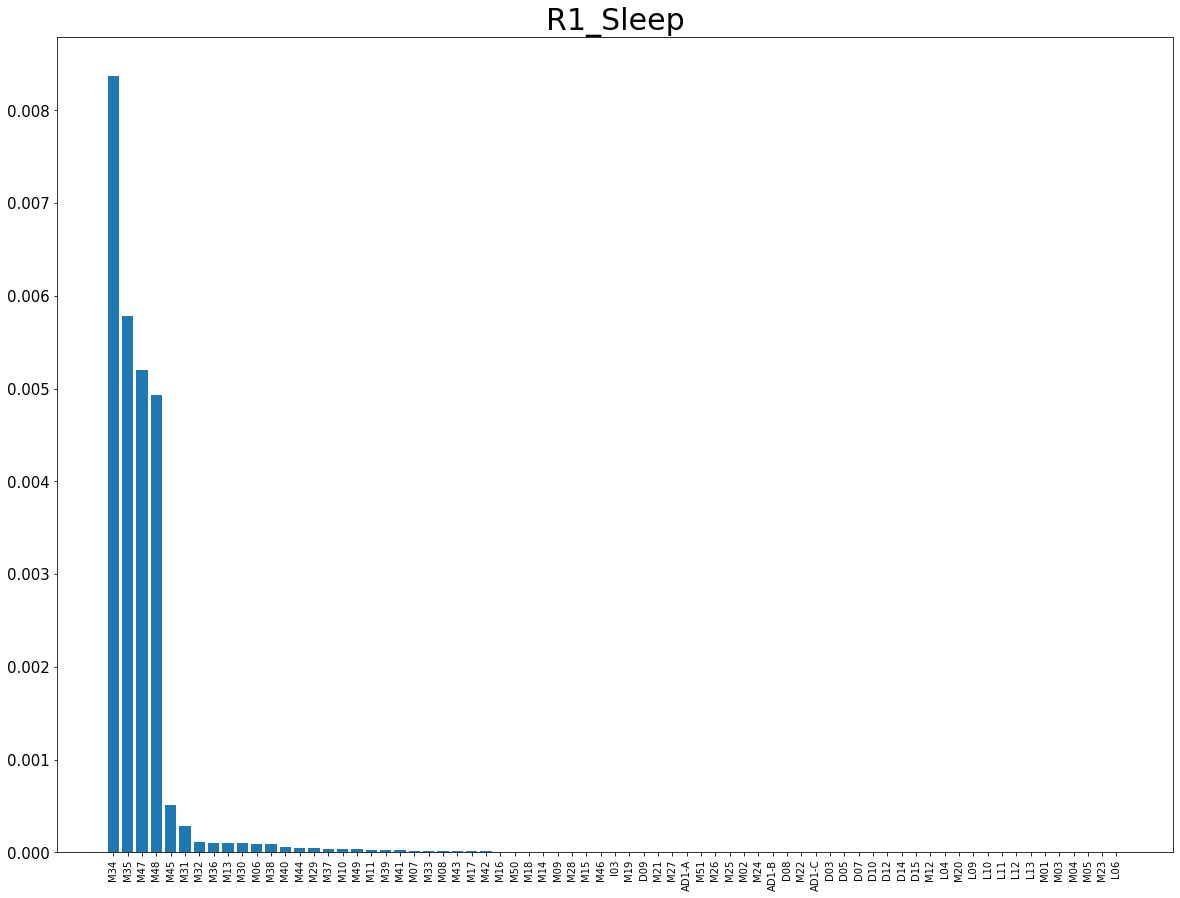

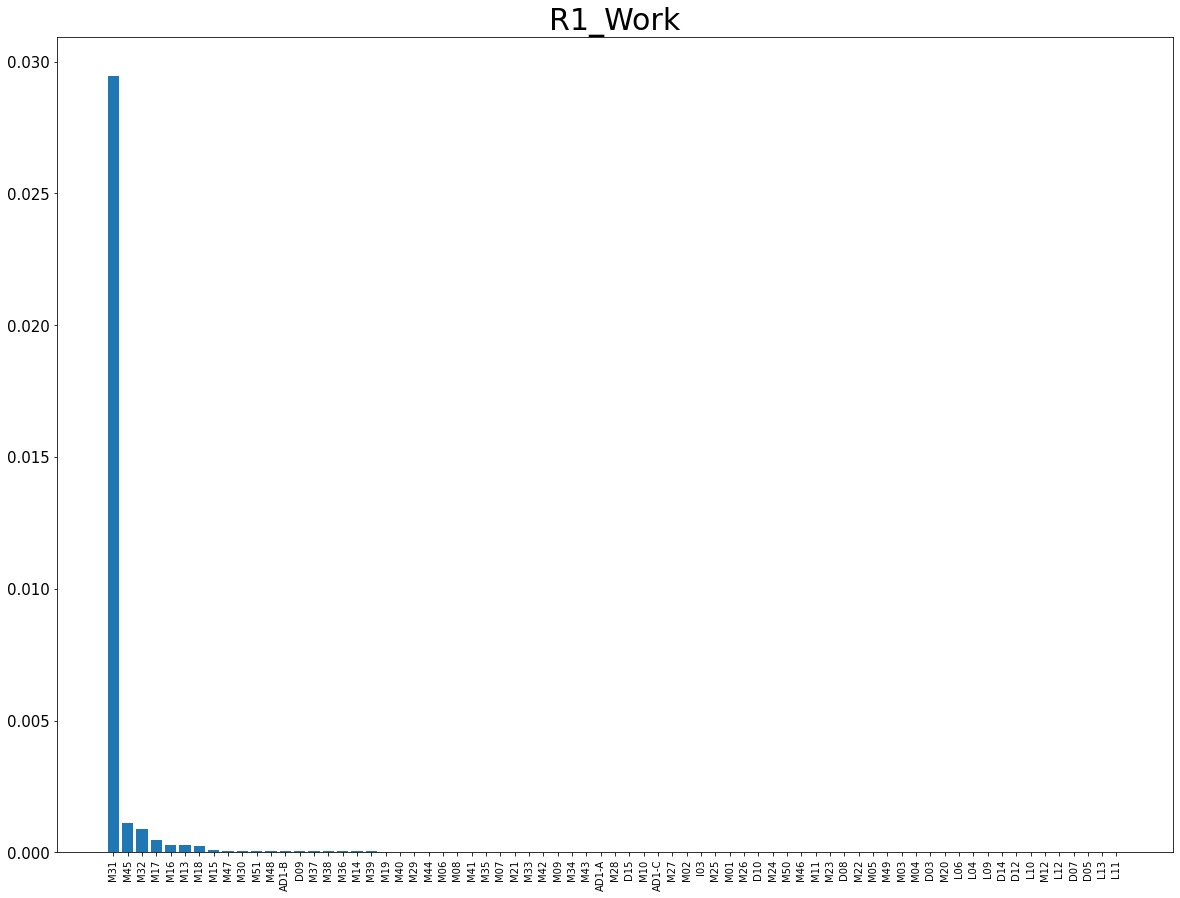

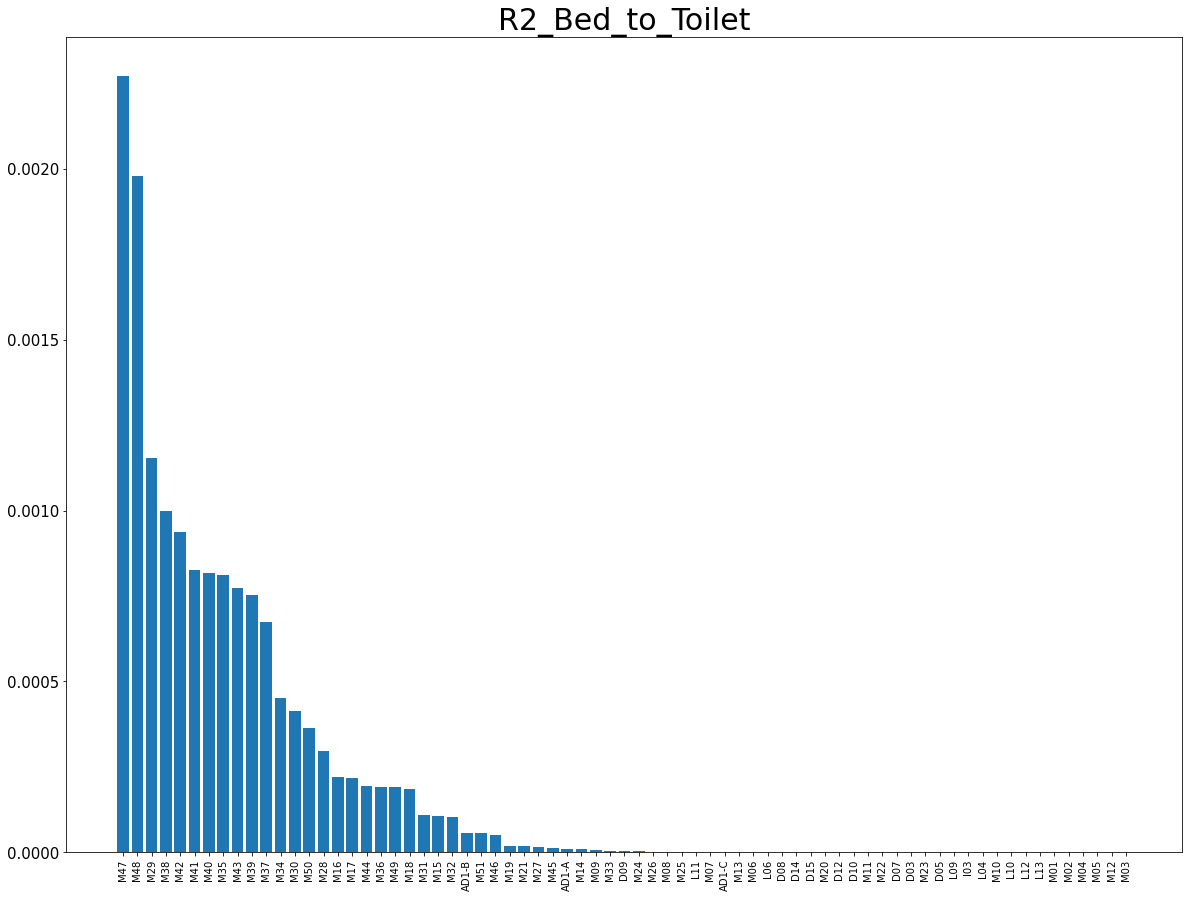

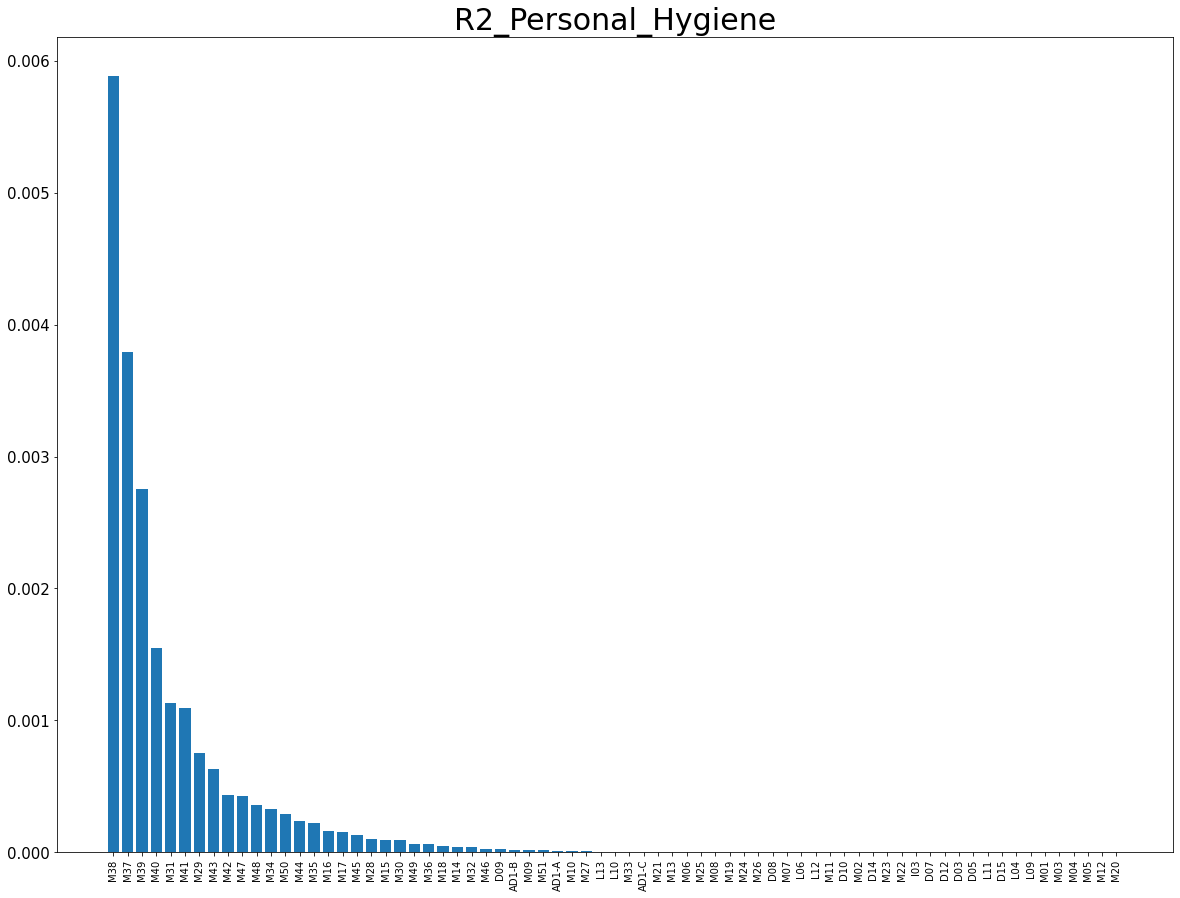

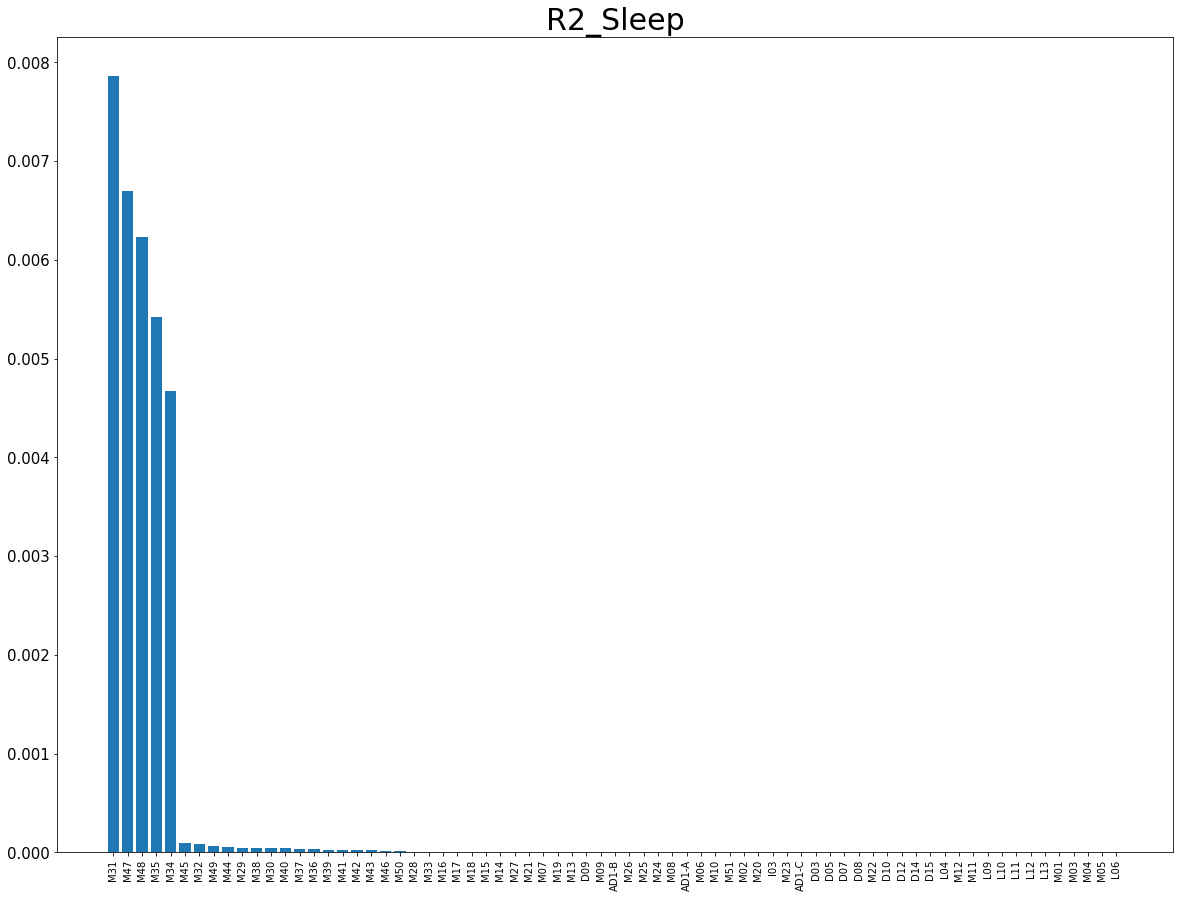

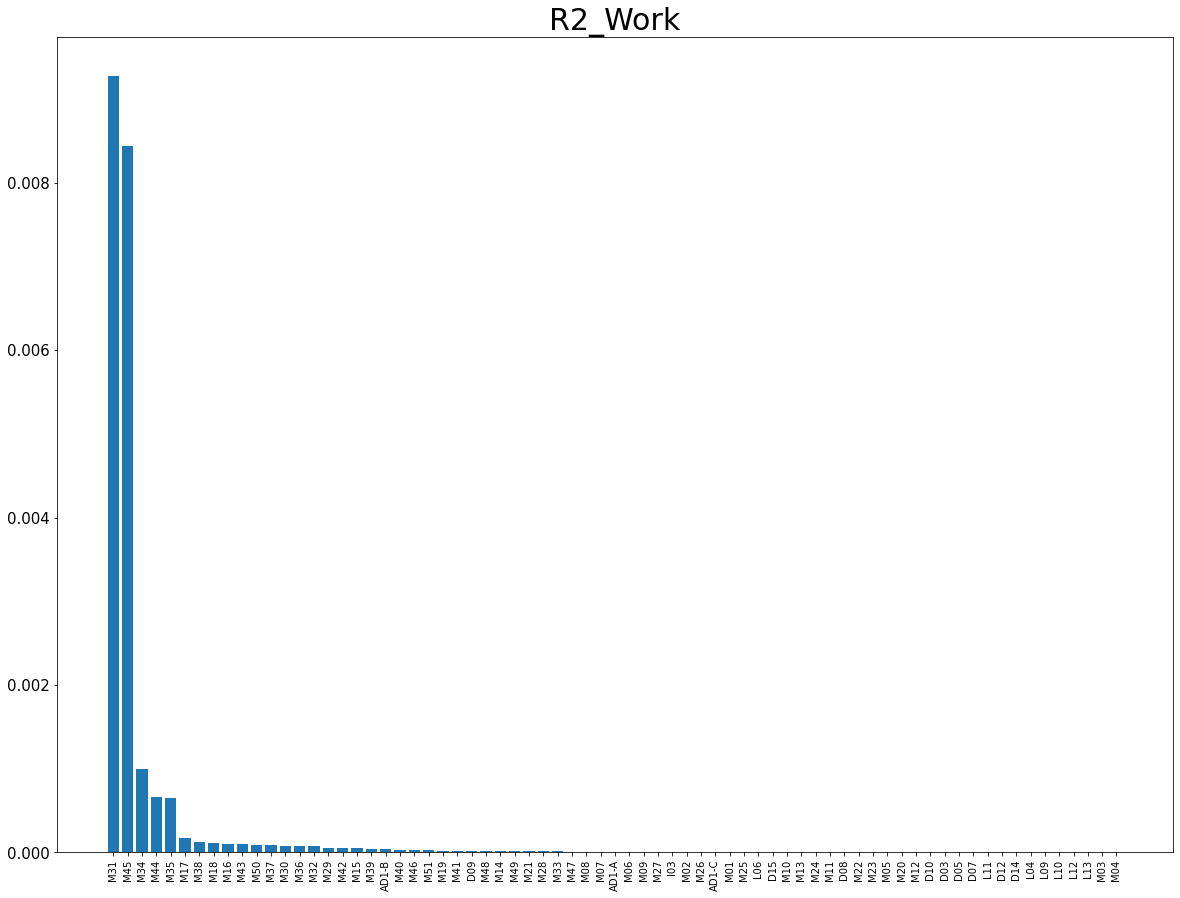

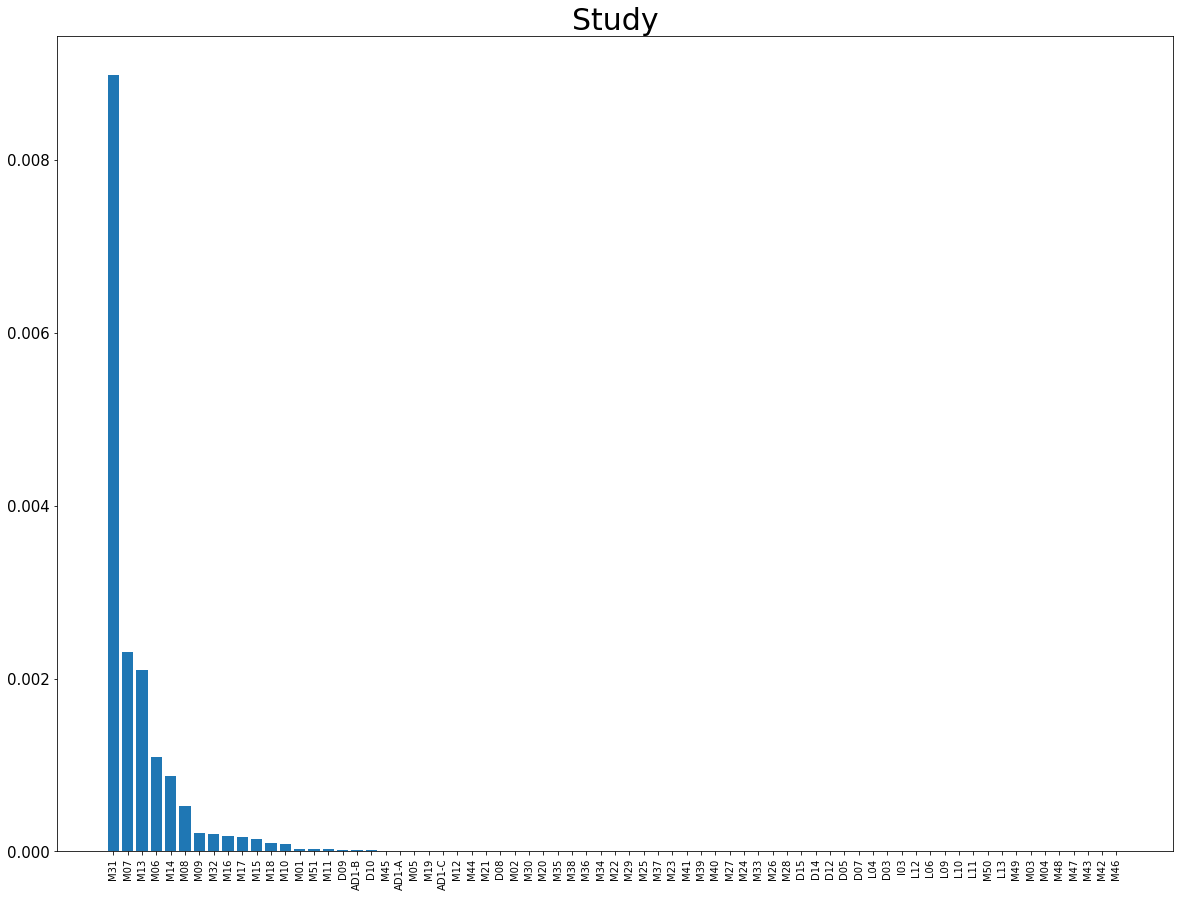

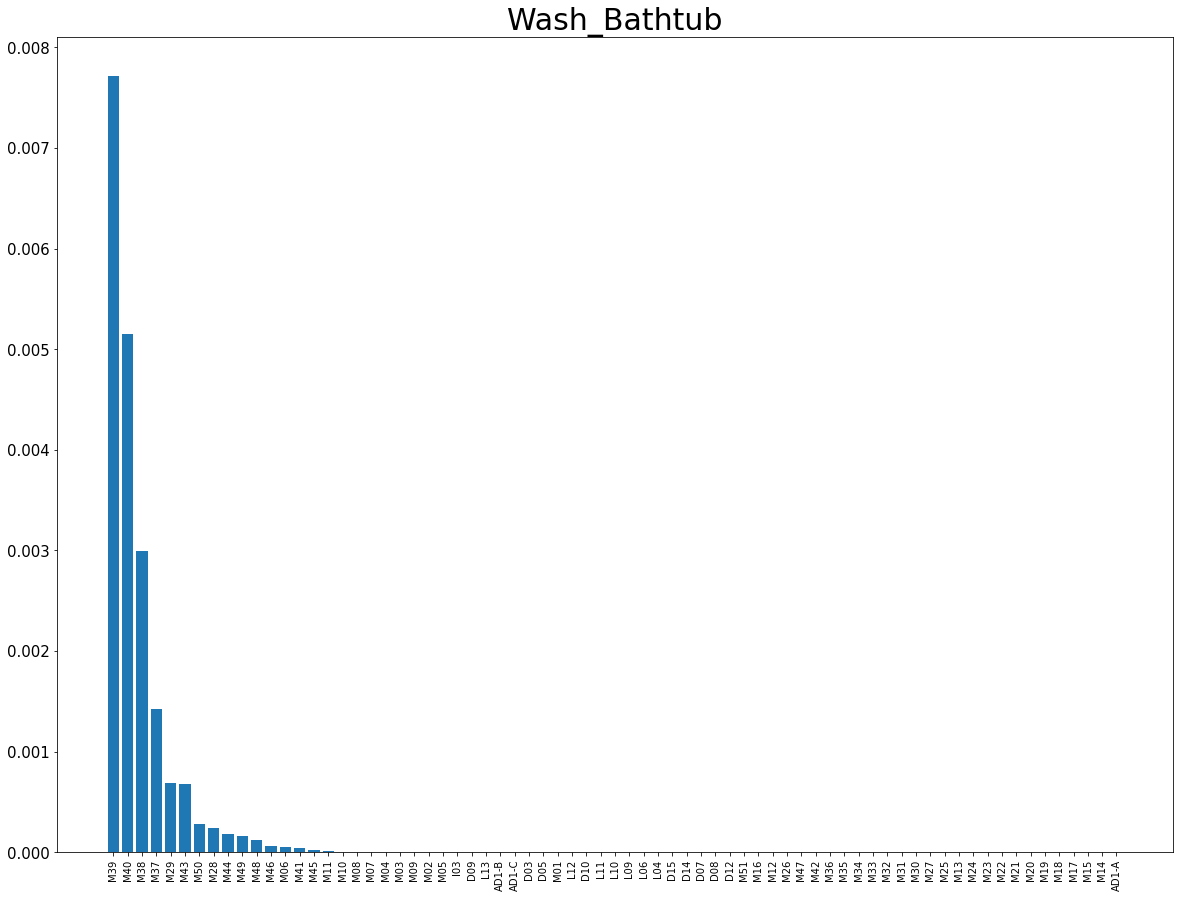

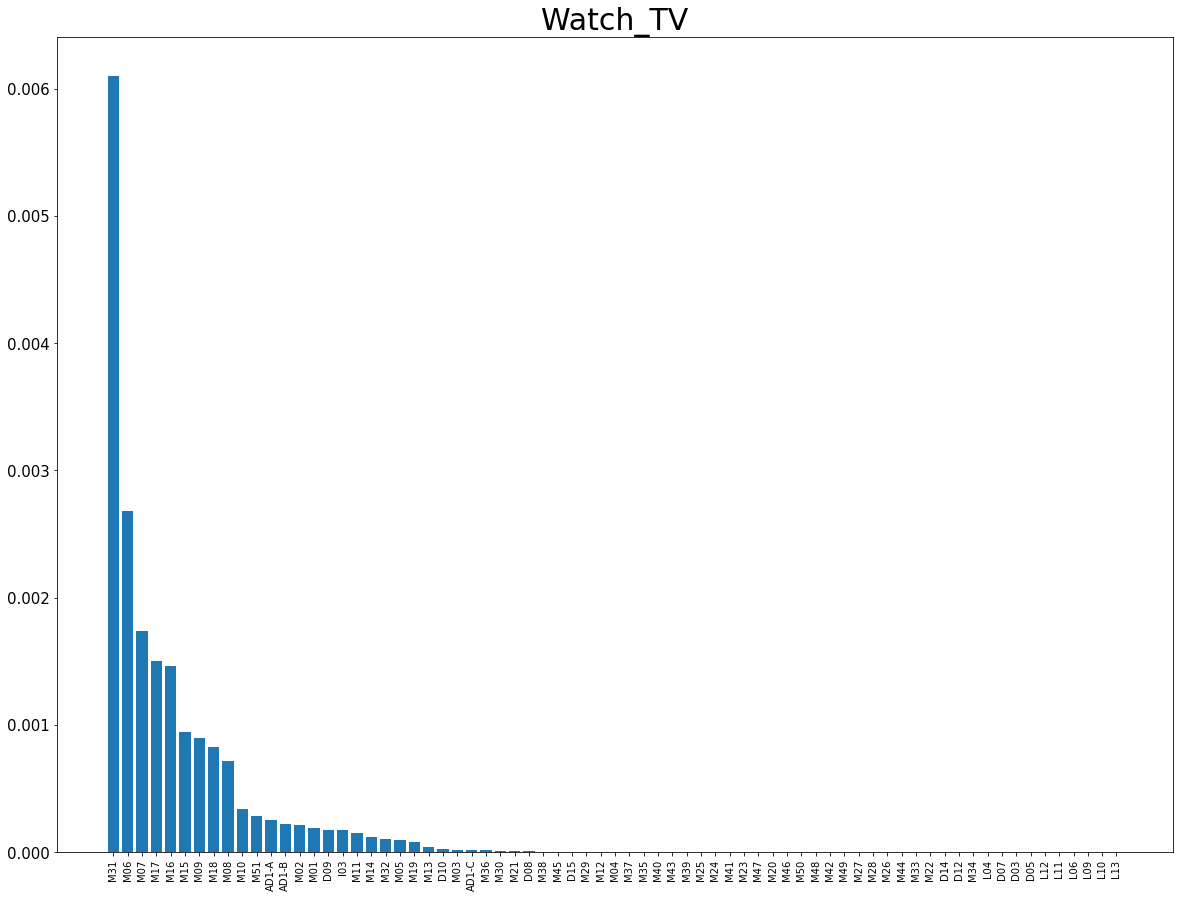

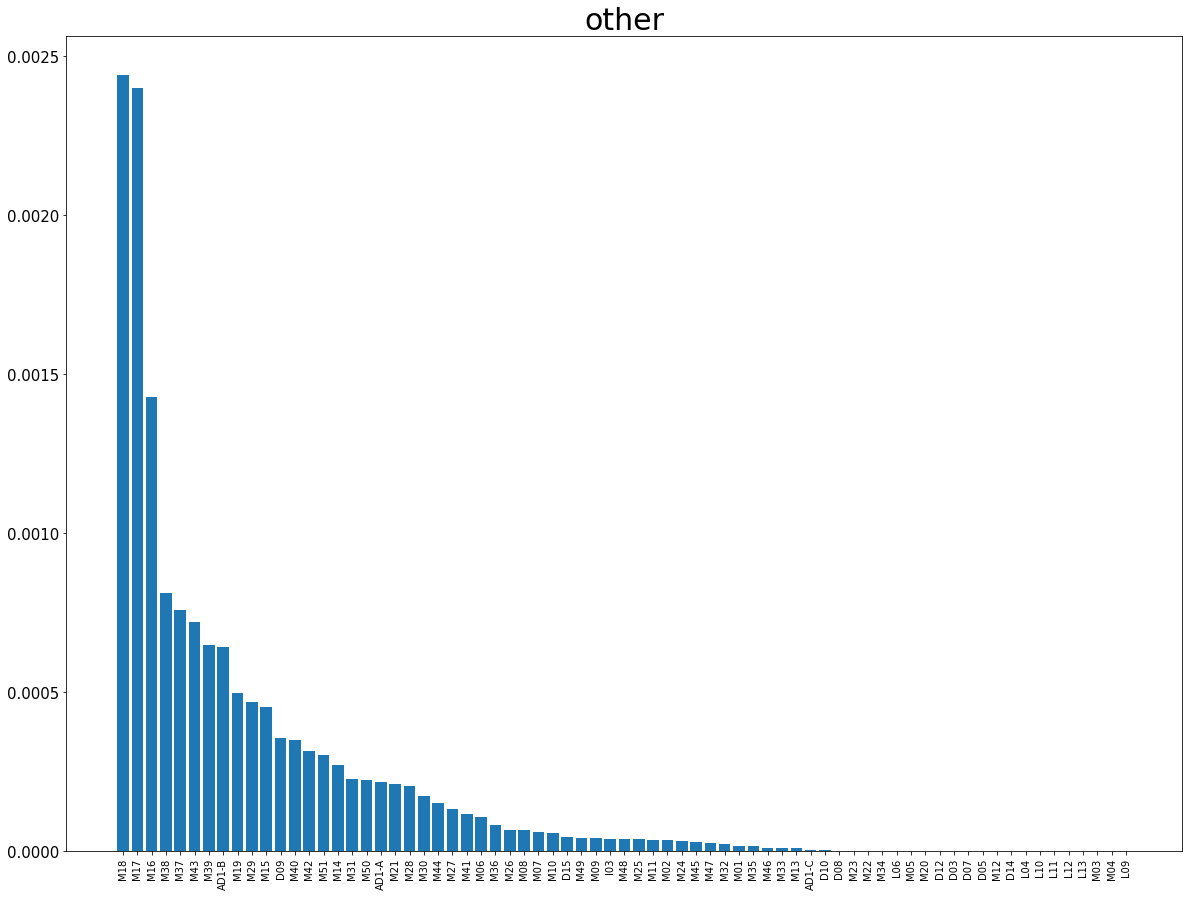

In [52]:
for label_index in range(len(result)):
    plt.figure(figsize=(20,15))

    title = str(activity_encoder.inverse_transform(sorted(df.activity.unique()))[label_index])
    plt.title(title, fontsize = 30)

    sorted_indices = np.argsort(list(result[label_index].values())[:71])[::-1] #降序indices


    values = [list(result[label_index].values())[idx] for idx in sorted_indices]
    plt.bar(np.array(feature_names)[sorted_indices], values)
           # color="r", align="center")
    plt.xticks(rotation=90)
    # plt.xlim([-1, len(result[i])])
    plt.tick_params(axis='y', labelsize = 15)
    plt.savefig("images_ActivityRecognition/importance_per_activity/" + title + ".pdf")

In [46]:
# print(np.argsort(list(result[0].values())))
# print(list(result[0].values()))
